## Plant Disease Prediction with CNN

### Seeding for reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importinmg the dependencies

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks

### Data Curation

#### Upload kaggle datatset

In [3]:
!pip install kaggle

In [4]:
kaggle_credentials = json.load(open('kaggle-api-key.json'))

In [5]:
#setup kaggle api as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.03G/2.04G [00:19<00:00, 123MB/s]
100% 2.04G/2.04G [00:19<00:00, 114MB/s]


In [7]:
!ls

kaggle-api-key.json  plantvillage-dataset.zip  sample_data


In [8]:
#Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Leaf_Mold', 'Grape___Black_rot', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Septoria_leaf_spot']
38
['Tomato___Leaf_Mold', 'Grape___Black_rot', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Septoria_leaf_spot']
38
['Tomato___Leaf_Mold', 'Grape___Black_rot', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Septoria_leaf_spot']


#### No of Classes = 38

In [10]:
print(len(os.listdir('plantvillage dataset/color/Grape___healthy')))
print(os.listdir('plantvillage dataset/color/Grape___healthy')[:5])

423
['7dcbe0fa-4dc1-4234-97d4-9c19391fbe21___Mt.N.V_HL 9114.JPG', 'f21a88fa-5ee6-4e27-b9c1-d3a263b8cea5___Mt.N.V_HL 9024.JPG', '0ce12a10-c6ff-494e-a927-5ddc809c707a___Mt.N.V_HL 8945.JPG', '515937e8-f329-406e-8d77-c9ddba3e399b___Mt.N.V_HL 9098.JPG', '244804b5-05e2-4372-a376-36a0655aff41___Mt.N.V_HL 6121.JPG']


### Data Preprocessing

In [11]:
#dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


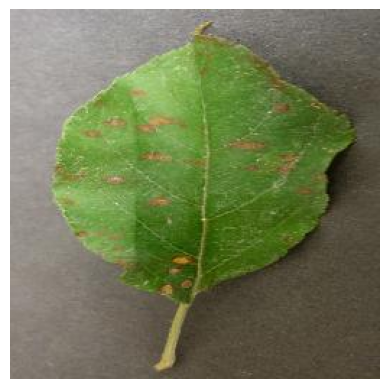

In [12]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [13]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [14]:
# Image Parameters
img_size = 224
batch_size = 32

### Train Test Split

In [15]:
# Image Data Generators
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2  # Use 20% of data for validation
# )

In [16]:
# Image Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [17]:
# Train Generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [18]:
# Validation Generator
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


## CNN

In [20]:
# #Model Defenition
# # from tensorflow.keras import layers, models

# # Define your CNN model
# model = models.Sequential()

# # Convolutional layers with batch normalization
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(layers.BatchNormalization())  # Add batch normalization
# model.add(layers.MaxPooling2D(2, 2))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.BatchNormalization())  # Add batch normalization
# model.add(layers.MaxPooling2D(2, 2))

# # Flatten and fully connected layers
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))  # Add dropout layer (adjust dropout rate as needed)
# model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

In [62]:
# Model Definition
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(layers.MaxPooling2D(2, 2))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(2, 2))


# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [72]:
# Model Definition
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model.add(layers.MaxPooling2D(2, 2))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(2, 2))


# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [41]:
#Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [42]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 96)        55392     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 96)       

In [43]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#Compile the model
# adam_optimizer = optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate if needed
# model.compile(optimizer=adam_optimizer,
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


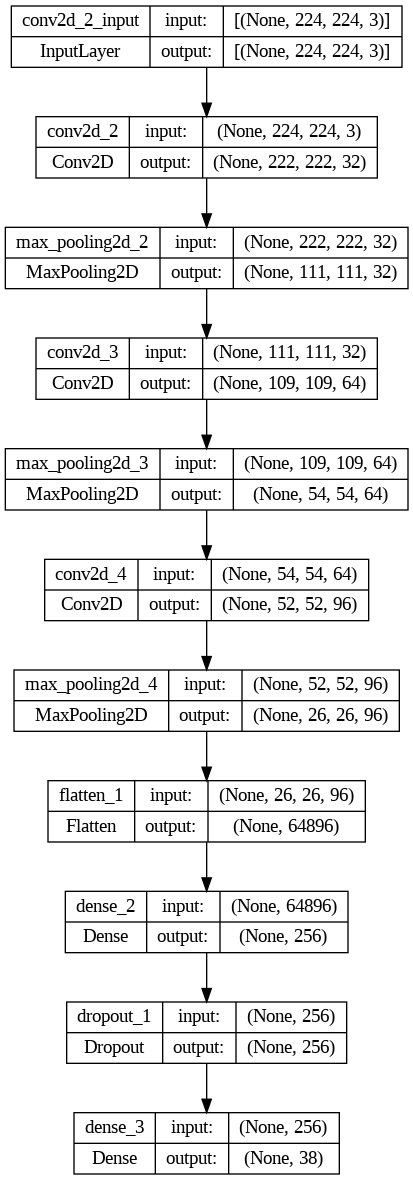

In [44]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
# #Define a learning rate scheduler
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, verbose=1)

# # Compile the model with the learning rate scheduler
# model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust the learning rate as needed
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Print model summary
# model.summary()

### Model Training

In [45]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
1358/1358 [==============================] - 131s 95ms/step - loss: 1.2366 - accuracy: 0.6502 - val_loss: 0.4974 - val_accuracy: 0.8424
Epoch 2/10
1358/1358 [==============================] - 124s 91ms/step - loss: 0.5151 - accuracy: 0.8372 - val_loss: 0.3866 - val_accuracy: 0.8800
Epoch 3/10
1358/1358 [==============================] - 123s 91ms/step - loss: 0.3302 - accuracy: 0.8935 - val_loss: 0.2951 - val_accuracy: 0.9066
Epoch 4/10
1358/1358 [==============================] - 125s 92ms/step - loss: 0.2285 - accuracy: 0.9241 - val_loss: 0.2433 - val_accuracy: 0.9265
Epoch 5/10
1358/1358 [==============================] - 124s 91ms/step - loss: 0.1706 - accuracy: 0.9442 - val_loss: 0.2446 - val_accuracy: 0.9273
Epoch 6/10
1358/1358 [==============================] - 126s 93ms/step - loss: 0.1350 - accuracy: 0.9557 - val_loss: 0.2863 - val_accuracy: 0.9215
Epoch 7/10
1358/1358 [==============================] - 135s 100ms/step - loss: 0.1154 - accuracy: 0.9620 - val_loss: 

### Model Evaluation

In [46]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 22s 66ms/step - loss: 0.3316 - accuracy: 0.9194
Validation Accuracy: 91.94%


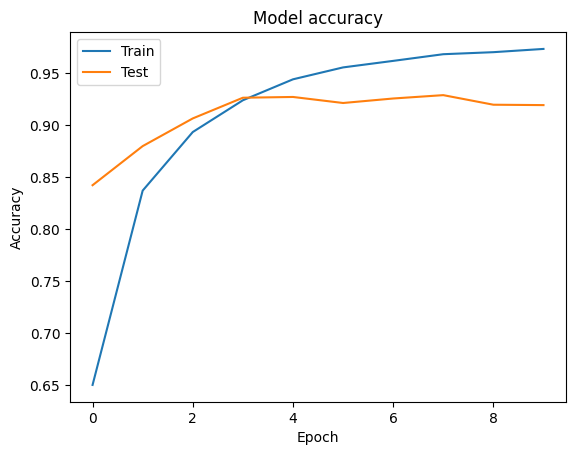

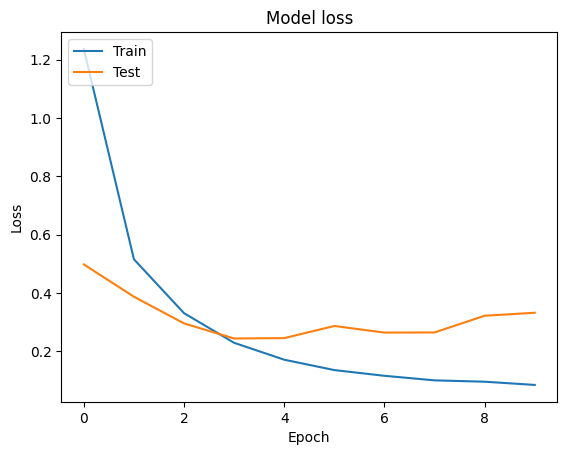

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Building a Predictive System

In [48]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [49]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [50]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

### HeatMap

In [51]:
import pandas as pd

def create_dataframe(base_dir):
    # List to store filepaths and labels
    filepaths = []
    labels = []

    # List all subfolders in the current data path
    folds = os.listdir(base_dir)

    # Iterate through each subfolder
    for fold in folds:
        f_path = os.path.join(base_dir, fold)
        imgs = os.listdir(f_path)

        # Iterate through images in the subfolder
        for img in imgs:
            img_path = os.path.join(f_path, img)

            # Append image path and corresponding label
            filepaths.append(img_path)
            labels.append(fold)

    # Create Pandas Series for filepaths and labels
    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')

    # Concatenate into a DataFrame and return
    return pd.concat([fseries, lseries], axis=1)

In [52]:
df = create_dataframe(base_dir)

class_labels_dict = {class_indices: idx for idx, class_indices in enumerate(np.unique(df['Labels']))}
df['Labels'] = df['Labels'].map(class_labels_dict)

In [53]:
print(df)

                                               Filepaths  Labels
0      plantvillage dataset/color/Tomato___Leaf_Mold/...      31
1      plantvillage dataset/color/Tomato___Leaf_Mold/...      31
2      plantvillage dataset/color/Tomato___Leaf_Mold/...      31
3      plantvillage dataset/color/Tomato___Leaf_Mold/...      31
4      plantvillage dataset/color/Tomato___Leaf_Mold/...      31
...                                                  ...     ...
54300  plantvillage dataset/color/Tomato___Early_blig...      29
54301  plantvillage dataset/color/Tomato___Early_blig...      29
54302  plantvillage dataset/color/Tomato___Early_blig...      29
54303  plantvillage dataset/color/Tomato___Early_blig...      29
54304  plantvillage dataset/color/Tomato___Early_blig...      29

[54305 rows x 2 columns]


In [54]:
import random
n =len(os.listdir('/content/plantvillage dataset/color'))
classif=[]
img_namess = []
for i in range(n):
    z=random.randint(0, 140)
    print(z)
    x = os.listdir('/content/plantvillage dataset/color')[i]
    img_namess.append(os.listdir('/content/plantvillage dataset/color/' + x)[z])
    classif.append(x)
print(classif)
print(img_namess)

for i in range(n):
    image_path = base_dir+'/'+classif[i]+'/'+img_namess[i]
    predicted_class_name = predict_image_class(model, image_path, class_indices)

131
60
61
2
81
8
72
20
70
81
23
10
28
105
114
132
55
35
123
55
75
132
52
108
119
137
34
123
30
102
99
134
134
101
25
50
71
24
['Tomato___Leaf_Mold', 'Grape___Black_rot', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Septoria_leaf_spot', 'Blueberry___healthy', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Potato___Early_blight', 'Pepper,_bell___Bacterial_spot', 'Soybean___healthy', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Common_rust_', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Pepper,_bell___healthy', 'Potato___Late_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___healthy', 'Grape___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Tomato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Apple_scab', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Corn_(maize)___healthy',

In [55]:
# n = len(os.listdir(os.path.join(base_dir)))

# # Initialize lists to store class names and image names
# classif = []
# img_namess = []

# # Initialize variables for accuracy calculation
# correct_predictions = 0
# total_predictions = 0

# # Initialize lists to store predicted and actual class names for reporting
# predicted_classes = []
# actual_classes = []

# # Iterate over each class directory
# for i in range(n):
#     class_folder = os.listdir(os.path.join(base_dir))[i]
#     random_img_index = random.randint(0, 140)
#     img_name = os.listdir(os.path.join(base_dir ,class_folder))[random_img_index]
#     img_namess.append(img_name)
#     classif.append(class_folder)

# # Iterate over each image to make predictions
# for i in range(n):
#     image_path = os.path.join(base_dir, classif[i], img_namess[i])
#     actual_class_name = classif[i]
#     predicted_class_name = predict_image_class(model, image_path, class_indices)

#     # Update variables for accuracy calculation
#     total_predictions += 1
#     if actual_class_name == predicted_class_name:
#         correct_predictions += 1

#     # Store predicted and actual class names for reporting
#     predicted_classes.append(predicted_class_name)
#     actual_classes.append(actual_class_name)

#     # Display image along with its predicted and actual class names
#     plt.figure(figsize=(4, 4))
#     img = plt.imread(image_path)
#     plt.imshow(img)
#     plt.title(f"Predicted: {predicted_class_name}\nActual: {actual_class_name}")
#     plt.axis('off')
#     plt.show()

# # Calculate accuracy
# accuracy = (correct_predictions / total_predictions) * 100
# print(f"Accuracy: {accuracy:.2f}%")

# # Report classification results
# from sklearn.metrics import classification_report
# print(classification_report(actual_classes, predicted_classes))

1/1 [==============================] - 0s 23ms/step


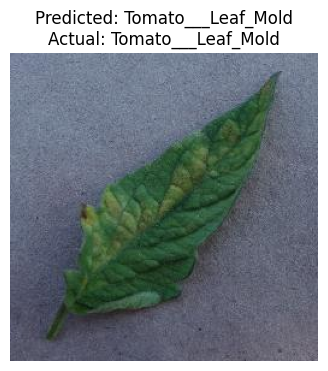

1/1 [==============================] - 0s 23ms/step


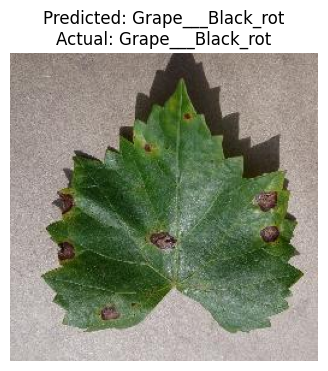

1/1 [==============================] - 0s 21ms/step


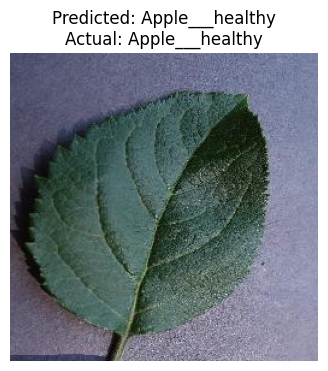

1/1 [==============================] - 0s 22ms/step


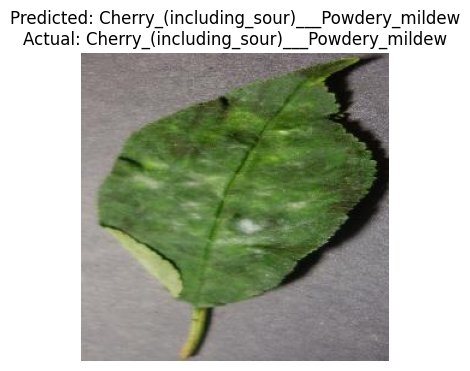

1/1 [==============================] - 0s 22ms/step


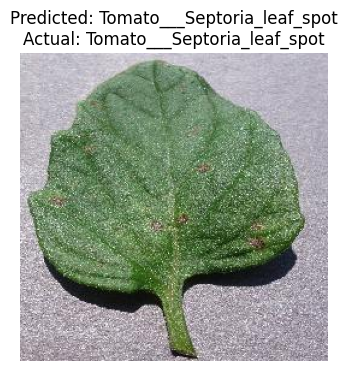

1/1 [==============================] - 0s 29ms/step


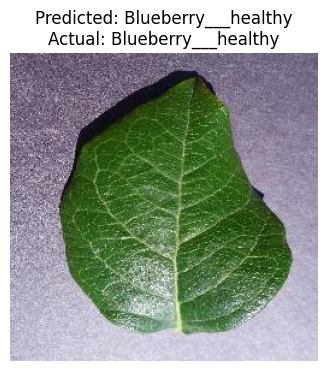

1/1 [==============================] - 0s 23ms/step


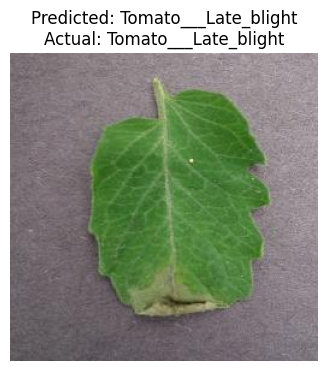

1/1 [==============================] - 0s 21ms/step


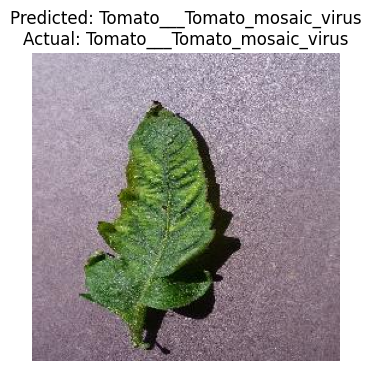

1/1 [==============================] - 0s 23ms/step


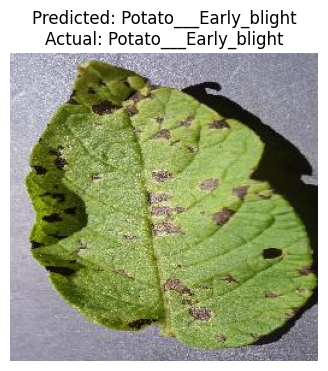

1/1 [==============================] - 0s 32ms/step


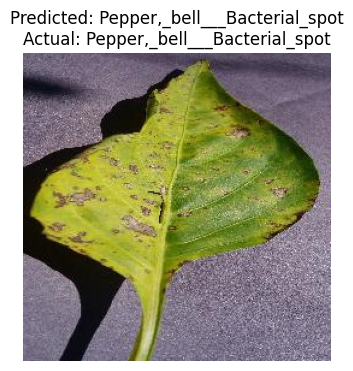

1/1 [==============================] - 0s 31ms/step


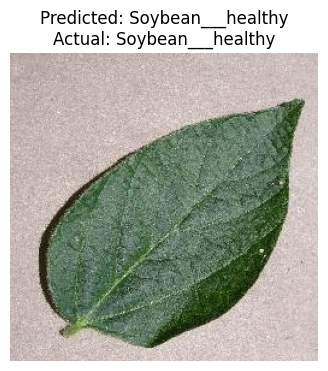

1/1 [==============================] - 0s 24ms/step


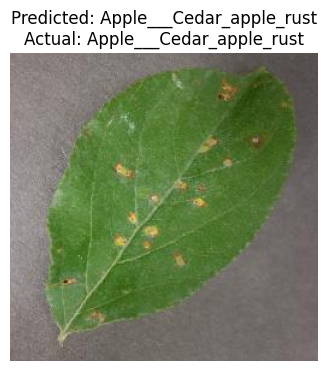

1/1 [==============================] - 0s 28ms/step


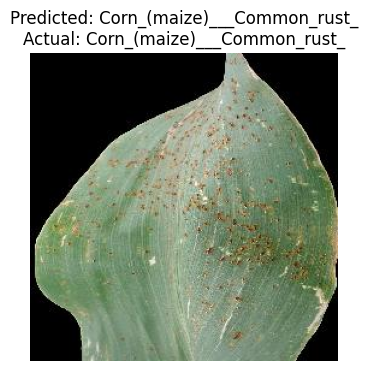

1/1 [==============================] - 0s 26ms/step


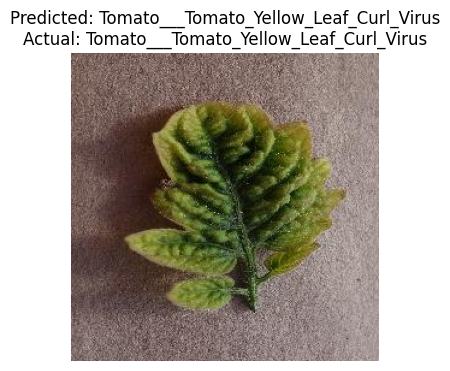

1/1 [==============================] - 0s 29ms/step


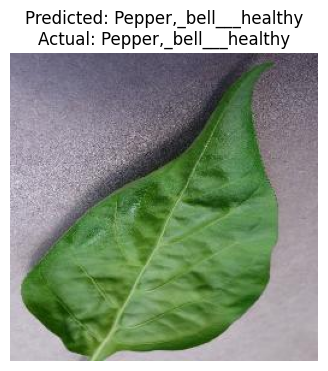

1/1 [==============================] - 0s 27ms/step


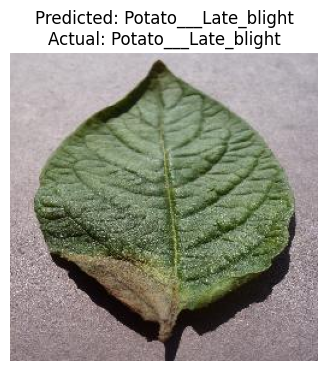

1/1 [==============================] - 0s 38ms/step


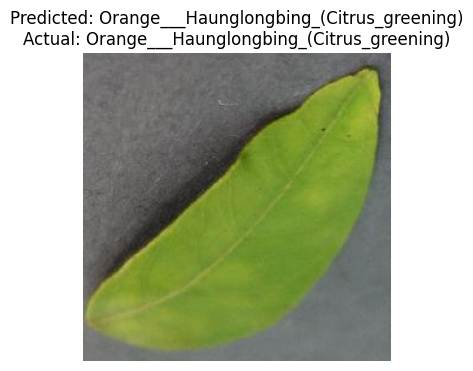

1/1 [==============================] - 0s 39ms/step


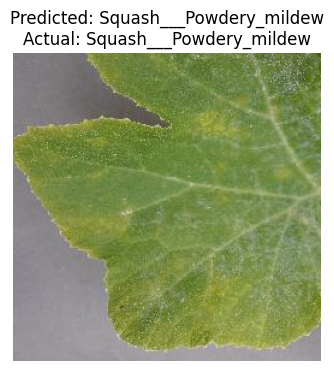

1/1 [==============================] - 0s 40ms/step


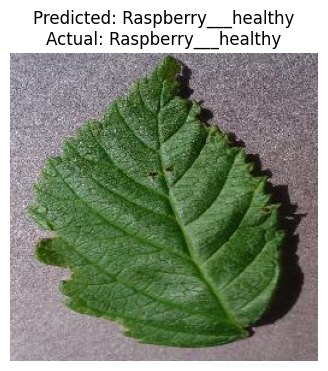

1/1 [==============================] - 0s 31ms/step


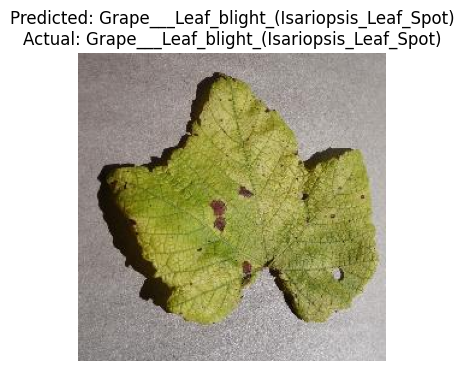

1/1 [==============================] - 0s 41ms/step


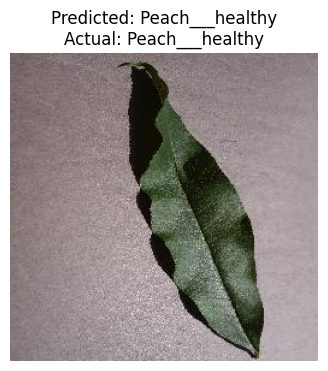

1/1 [==============================] - 0s 41ms/step


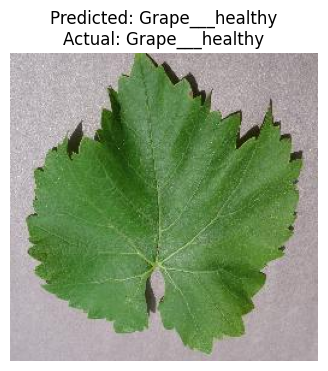

1/1 [==============================] - 0s 41ms/step


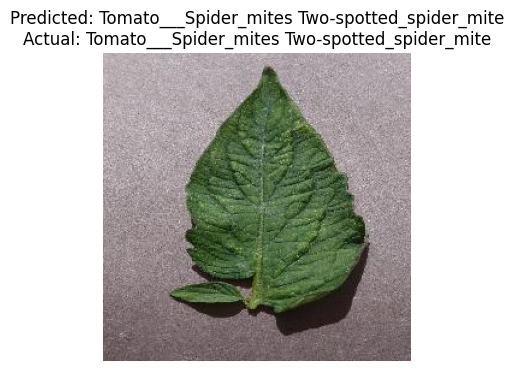

1/1 [==============================] - 0s 43ms/step


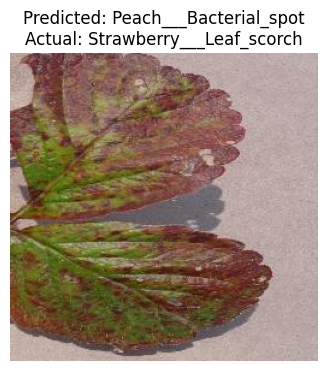

1/1 [==============================] - 0s 41ms/step


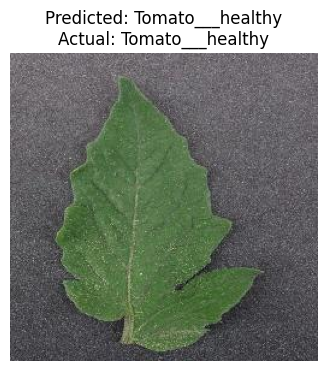

1/1 [==============================] - 0s 31ms/step


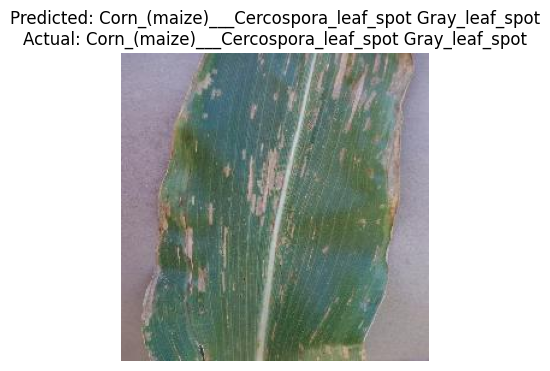

1/1 [==============================] - 0s 32ms/step


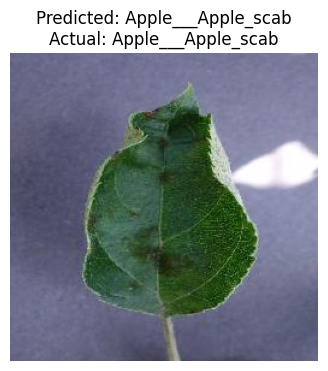

1/1 [==============================] - 0s 50ms/step


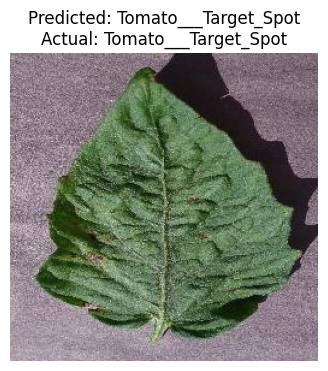

1/1 [==============================] - 0s 40ms/step


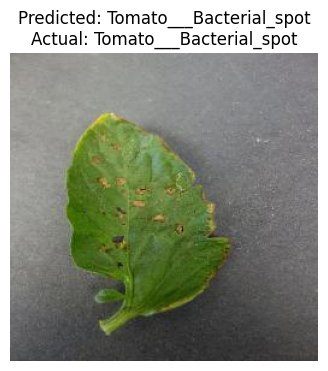

1/1 [==============================] - 0s 31ms/step


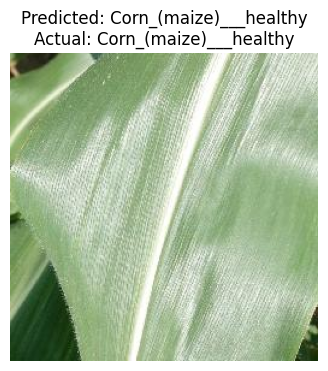

1/1 [==============================] - 0s 40ms/step


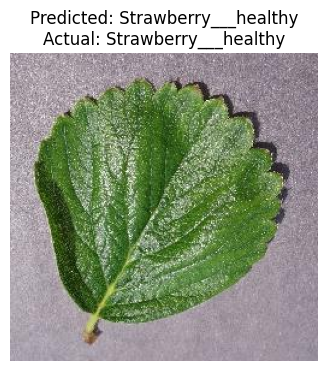

1/1 [==============================] - 0s 52ms/step


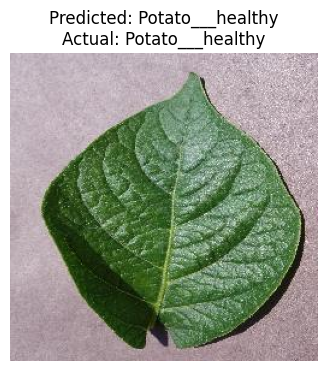

1/1 [==============================] - 0s 38ms/step


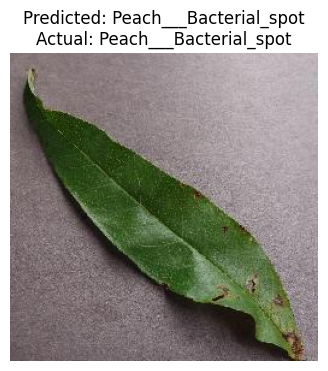

1/1 [==============================] - 0s 31ms/step


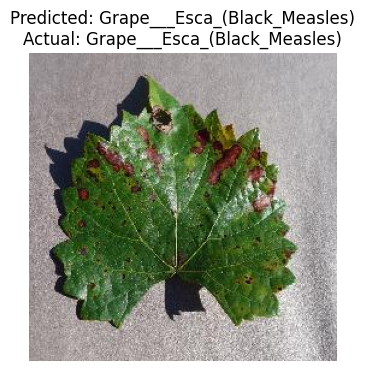

1/1 [==============================] - 0s 34ms/step


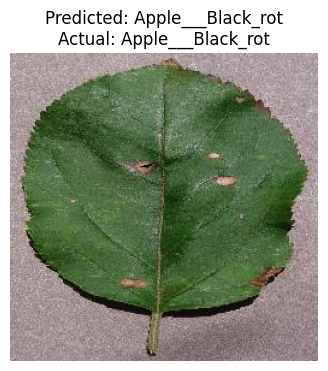

1/1 [==============================] - 0s 31ms/step


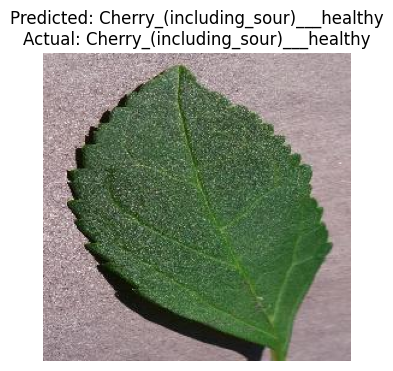

1/1 [==============================] - 0s 32ms/step


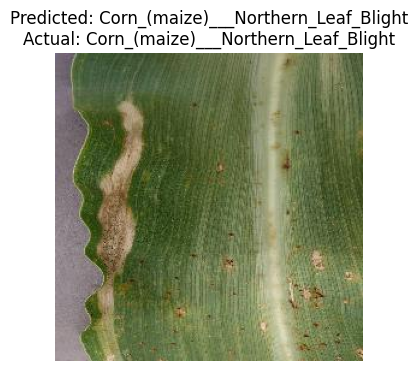

1/1 [==============================] - 0s 36ms/step


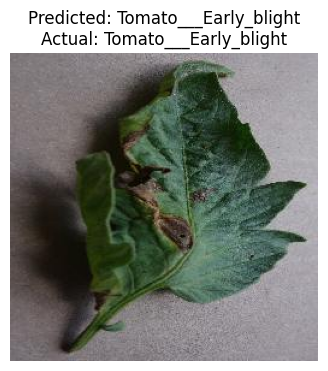

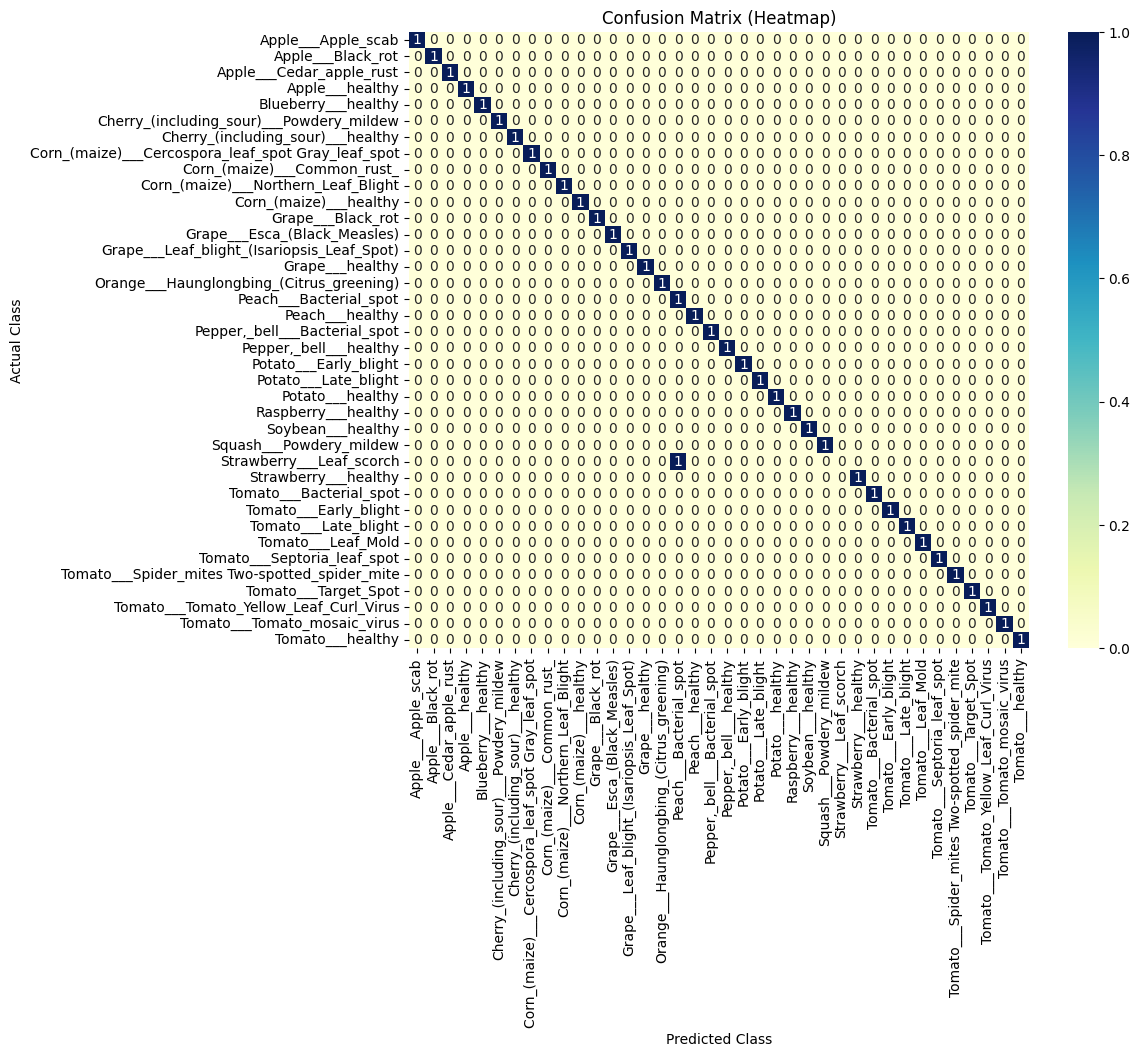

Accuracy: 97.37%
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00         1
                                 Apple___Black_rot       1.00      1.00      1.00         1
                          Apple___Cedar_apple_rust       1.00      1.00      1.00         1
                                   Apple___healthy       1.00      1.00      1.00         1
                               Blueberry___healthy       1.00      1.00      1.00         1
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00         1
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00         1
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      1.00      1.00         1
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00         1
               Corn_(maize)___Northern_Leaf_Blight       1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
import seaborn as sns
n = len(os.listdir(os.path.join(base_dir)))

# Initialize lists to store class names and image names
classif = []
img_namess = []

# Initialize variables for accuracy calculation
correct_predictions = 0
total_predictions = 0

# Initialize lists to store predicted and actual class names for reporting
predicted_classes = []
actual_classes = []

# Iterate over each class directory
for i in range(n):
    class_folder = os.listdir(os.path.join(base_dir))[i]
    random_img_index = random.randint(0, 140)
    img_name = os.listdir(os.path.join(base_dir, class_folder))[random_img_index]
    img_namess.append(img_name)
    classif.append(class_folder)

# Iterate over each image to make predictions
for i in range(n):
    image_path = os.path.join(base_dir, classif[i], img_namess[i])
    actual_class_name = classif[i]
    predicted_class_name = predict_image_class(model, image_path, class_indices)

    # Update variables for accuracy calculation
    total_predictions += 1
    if actual_class_name == predicted_class_name:
        correct_predictions += 1

    # Store predicted and actual class names for reporting
    predicted_classes.append(predicted_class_name)
    actual_classes.append(actual_class_name)

    # Display image along with its predicted and actual class names
    plt.figure(figsize=(4, 4))
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}\nActual: {actual_class_name}")
    plt.axis('off')
    plt.show()

# Sort the predicted and actual class names alphabetically
sorted_indices = np.argsort(predicted_classes)
sorted_predicted_classes = [predicted_classes[i] for i in sorted_indices]
sorted_actual_classes = [actual_classes[i] for i in sorted_indices]

# Generate numerical labels for classes
unique_classes = sorted(set(sorted_actual_classes + sorted_predicted_classes))
class_labels = {cls: i for i, cls in enumerate(unique_classes)}
numerical_actual_classes = [class_labels[cls] for cls in sorted_actual_classes]
numerical_predicted_classes = [class_labels[cls] for cls in sorted_predicted_classes]

# Generate a square matrix representing the correct predictions on the diagonal
confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))
for actual, predicted in zip(numerical_actual_classes, numerical_predicted_classes):
    confusion_matrix[actual, predicted] += 1

# Plot the heatmap with diagonal elements representing correct predictions
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu', fmt='g', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (Heatmap)')
plt.show()

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Report classification results
from sklearn.metrics import classification_report
print(classification_report(sorted_actual_classes, sorted_predicted_classes))

In [57]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [58]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
# image_path = '/content/test_blueberry_healthy.jpg'
# image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 32ms/step
Predicted Class Name: Apple___Black_rot


### Save the model to Google drive or local

In [59]:
model.save('drive/MyDrive/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
model.save('plant_disease_prediction_model.h5')